In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
%matplotlib inline

In [ ]:
ndf = pd.read_csv('APL_Final_data_with_infScore (1).csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
ndf

,Unnamed: 0,Open,High,Low,Close,Volume,Sen_score,Sen_label,T_id,Inf_Score,TWITTER HANDLE,s_score_mean,s_sentiment_label,Infs_mean,Infs_add,next_day_close_price,next_day_open_price
Date,,,,,,,,,,,,,,,,,
2016-01-01,0,500.010,500.01,498.010,498.51,500,[],[],[],[],[],0.00000,NaN,0.000000,0.000000,498.51,497.505
2016-01-02,1,497.505,500.00,495.505,498.51,2300,[],[],[],[],[],0.00000,NaN,0.000000,0.000000,498.51,497.505
2016-01-03,2,497.505,500.00,495.505,498.51,2300,[ 0.0772 -0.8834],['Pos' 'Neg'],[704577331432660992 704662143090761728],[0.00027914 0.00231668],['nimraraees99' 'frontpocket00'],-0.40310,Neu,0.001298,0.002596,498.51,497.505
2016-01-04,3,497.505,500.00,495.505,498.51,2300,[],[],[704577331432660992 704662143090761728],[],[],0.00000,NaN,0.000000,0.000000,495.91,495.000
2016-01-05,4,495.000,499.99,493.000,495.91,4100,[],[],[704577331432660992 704662143090761728],[],[],0.00000,NaN,0.000000,0.000000,492.00,495.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1456,371.000,375.00,361.000,363.94,155600,[],[],[ 704577331432660992 704662143090761728 7600...,[],[],0.00000,NaN,0.000000,0.000000,365.07,369.500
2019-12-28,1457,369.500,372.50,363.500,365.07,106050,[-0.9007 -0.7003 -0.9007],['Neg' 'Neg' 'Neg'],[ 704577331432660992 704662143090761728 7600...,[0.00081098 0.01342346 0.02072638],['DariusChirchir' 'Mombasapresscl1' 'ekisianga...,-0.83390,Neg,0.011654,0.034961,365.07,369.500
2019-12-29,1458,369.500,372.50,363.500,365.07,106050,[],[],[ 704577331432660992 704662143090761728 7600...,[],[],0.00000,NaN,0.000000,0.000000,366.20,368.000


In [ ]:
ndf = ndf[["Close", "s_score_mean", "Open", "High", "Low" , "next_day_open_price" ,"Infs_add"	]]
ndf = ndf.dropna()
ndf.shape

(1460, 7)

In [ ]:
X = ndf[["Close", "s_score_mean","Infs_add" , "Open"	]]
Y = ndf['next_day_open_price']
yy = np.array(Y).reshape(-1, 1)

In [ ]:
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(yy))




X_train = X[: X_split]
X_test = X[X_split:]
y_train = yy[: y_split]

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1021, 3) (439, 3) (1021, 1) (439, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [ ]:
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_reg_prediction = linear_reg.predict(X_test)
inear_reg_prediction2 = linear_reg.predict(X_train)

In [ ]:
predicted = linear_reg_prediction

In [ ]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))
print('Mean Squared Error:', mean_squared_error(y_test, predicted))

Root Mean Squared Error: 0.026490009376593005
R-squared : 0.9897582819502581
Mean Squared Error: 0.0007017205967719853


In [ ]:
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))


Text(0.5, 1.0, 'Performance of  model')

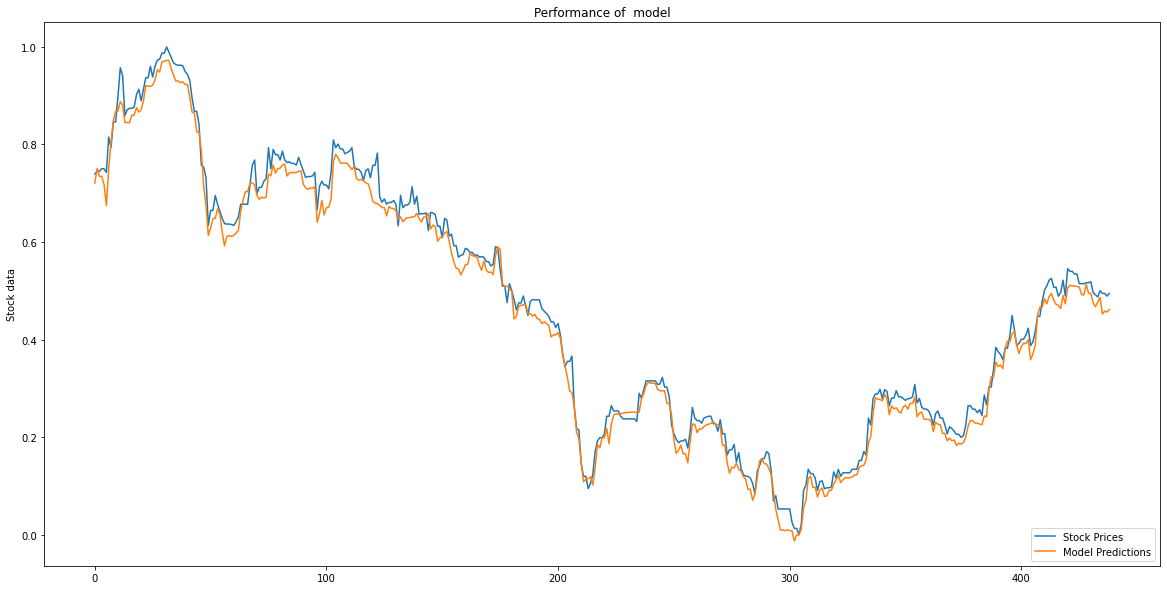

In [ ]:
plt.figure(figsize=(20,10))
range_future = len(predicted)
plt.plot( np.array(stocks['Real']),label='Test data')
plt.plot( np.array(stocks['Predicted']),label='Prediction')
plt.legend(['Stock Prices', 'Model Predictions'], loc='lower right')
plt.ylabel('Stock data')
plt.title('Performance of  model')